In [1]:
%autosave 3600

Autosaving every 3600 seconds


In [2]:
# HIDDEN
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

## Lecture 23 ##

### Percentiles

In [3]:
x = make_array(43, 20, 51, 7, 28, 34)
y = np.sort(x)
y

array([ 7, 20, 28, 34, 43, 51])

In [4]:
0.55 * 6

3.3000000000000003

In [5]:
percentile(55, x)

34

### Bootstrap

In [6]:
sf = Table.read_table('san_francisco_2015.csv')
sf

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,2,"Public Works, Transportation & Commerce",WTR,PUC Water Department,21,"Prof & Tech Engineers - Miscellaneous, Local 21",2400,"Lab, Pharmacy & Med Techs",2481,Water Qualitytech I/II,21538,82146,0,0,82146,16942.2,12340.9,6337.73,35620.8,117767
Calendar,2015,2,"Public Works, Transportation & Commerce",DPW,General Services Agency - Public Works,12,"Carpet, Linoleum and Soft Tile Workers, Local 12",7300,Journeyman Trade,7393,Soft Floor Coverer,5459,32165.8,973.19,848.96,33987.9,0,4587.51,2634.42,7221.93,41209.8
Calendar,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",1600,"Payroll, Billing & Accounting",1636,Health Care Billing Clerk 2,41541,71311,5757.98,0,77069,14697.6,12424.5,6370.06,33492.2,110561
Calendar,2015,4,Community Health,DPH,Public Health,351,Municipal Executive Association - Miscellaneous,0900,Management,2620,Food Service Mgr Administrator,26718,28430.2,0,763.07,29193.3,0,4223.14,5208.51,9431.65,38625
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",8200,Protection & Apprehension,8201,School Crossing Guard,45810,7948.75,0,0,7948.75,0,2873.17,616.24,3489.41,11438.2
Calendar,2015,1,Public Protection,POL,Police,911,Police Officers' Association,Q000,Police Services,Q002,Police Officer,32906,2235,0,0,2235,490.36,286.72,176.57,953.65,3188.65
Calendar,2015,4,Community Health,DPH,Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,2328,Nurse Practitioner,7506,187247,0,11704.1,198951,37683.7,12424.5,11221.7,61329.9,260281
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,253,"Transport Workers - Transit Operators, Local 250-A",9100,Street Transit,9163,Transit Operator,36773,66988.5,3512.88,2770.39,73271.8,19127.2,13203,5455.1,37785.3,111057
Calendar,2015,6,General Administration & Finance,CAT,City Attorney,311,Municipal Attorneys' Association,8100,Legal & Court,8177,Attorney (Civil/Criminal),12963,135190,0,1562.5,136752,27501.8,12424.5,10103,50029.3,186781
Calendar,2015,3,Human Welfare & Neighborhood Development,DSS,Human Services,535,"SEIU - Human Services, Local 1021",9700,Community Development,9703,Emp & Training Spec 2,35179,70474.8,147.28,1647.24,72269.3,14650.3,10696.9,5993.11,31340.3,103610


In [7]:
sf.where('Job', 'Mayor')

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,6,General Administration & Finance,MYR,Mayor,556,Elected Officials,1100,Administrative & Mgmt (Unrep),1190,Mayor,22433,288964,0,0,288964,58117,12424.5,20293,90834.5,379798


In [8]:
sf.sort('Total Compensation', descending=True).show(5)

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,6,General Administration & Finance,RET,Retirement System,351,Municipal Executive Association - Miscellaneous,1100,Administrative & Mgmt (Unrep),1119,Chief Investment Officer,46881,507832,0,0,507832,105053,12424.5,23566.2,141044,648875
Calendar,2015,6,General Administration & Finance,ADM,General Services Agency - City Admin,164,Physicians and Dentists - Miscellaneous,2500,Med Therapy & Auxiliary,2598,Asst Med Examiner,1016,279311,3829.36,114434,397574,56211.6,12424.5,14299.1,82935.2,480509
Calendar,2015,6,General Administration & Finance,ADM,General Services Agency - City Admin,164,Physicians and Dentists - Miscellaneous,2500,Med Therapy & Auxiliary,2598,Asst Med Examiner,13746,279311,9046.92,56742.6,345101,56211.6,12424.5,13482.7,82118.8,427219
Calendar,2015,2,"Public Works, Transportation & Commerce",AIR,Airport Commission,351,Municipal Executive Association - Miscellaneous,0900,Management,0965,Dept Head V,17356,326764,0,0,326764,65806.3,12424.5,21691.2,99922.1,426686
Calendar,2015,4,Community Health,DPH,Public Health,351,Municipal Executive Association - Miscellaneous,0900,Management,1164,"Adm, SFGH Medical Center",1523,256098,0,82292.3,338390,51977.5,11468.8,20963.3,84409.6,422800


In [9]:
sf.sort('Total Compensation', descending=False).show(5)

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,1,Public Protection,FIR,Fire Department,798,"Firefighters - Miscellaneous, Local 798",H000,Fire Services,H002,Firefighter,43833,0,0,0,0,0,0,-423.76,-423.76,-423.76
Calendar,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",9900,Public Service Aide,9924,PS Aide Health Services,27871,-292.4,0,0,-292.4,0,-95.58,-22.63,-118.21,-410.61
Calendar,2015,1,Public Protection,JUV,Juvenile Probation,790,"SEIU - Miscellaneous, Local 1021",8300,Correction & Detention,8320,"Counselor, Juvenile Hall",10517,0,0,0,0,0,0,-159.12,-159.12,-159.12
Calendar,2015,6,General Administration & Finance,CPC,City Planning,21,"Prof & Tech Engineers - Miscellaneous, Local 21",1000,Information Systems,1053,IS Business Analyst-Senior,18961,0,0,0,0,0,0,-26.53,-26.53,-26.53
Calendar,2015,6,General Administration & Finance,CPC,City Planning,21,"Prof & Tech Engineers - Miscellaneous, Local 21",5200,Professional Engineering,5277,Planner 1,19387,0,0,0,0,0,0,-9.51,-9.51,-9.51


In [10]:
10 * 20 * 52

10400

In [11]:
sf = sf.where('Total Compensation', are.above(10000))

In [12]:
sf.num_rows

38217

In [13]:
percentile(50, sf.column('Total Compensation'))

107219.48

In [15]:
our_sample = sf.sample(300, with_replacement=False)
our_sample

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,2,"Public Works, Transportation & Commerce",ECN,Economic and Workforce Development,790,"SEIU - Miscellaneous, Local 1021",9700,Community Development,9774,Sr Community Devl Spc 1,52653,49477,0,0,49477,9434.53,6690.11,3741.12,19865.8,69342.8
Calendar,2015,2,"Public Works, Transportation & Commerce",AIR,Airport Commission,6,"Electrical Workers, Local 6",7500,Semi-Skilled & General Labor,7510,Lighting Fixture Maint Worker,52901,47030.2,4848.09,836,52714.3,11435.6,12137.8,4233.69,27807.1,80521.4
Calendar,2015,4,Community Health,DPH,Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,2320,Registered Nurse,5453,60726.7,486.07,1098.56,62311.3,11539.7,6217.03,4309.8,22066.5,84377.8
Calendar,2015,5,Culture & Recreation,REC,Recreation and Park Commission,790,"SEIU - Miscellaneous, Local 1021",3200,Recreation,3286,Recreation Coordinator,50200,12071.3,0,0,12071.3,0,2906.02,936.31,3842.33,15913.6
Calendar,2015,1,Public Protection,SHF,Sheriff,498,Deputy Sheriffs' Association,8300,Correction & Detention,8304,Deputy Sheriff,36107,97762.6,761.4,17283.1,115807,27255.8,12424.5,1925.09,41605.4,157412
Calendar,2015,3,Human Welfare & Neighborhood Development,DSS,Human Services,22,"Prof & Tech Engineers - Personnel, Local 21",1200,Personnel,1241,Personnel Analyst,31049,11200.5,0,0,11200.5,2512.27,1911.46,875.17,5298.9,16499.4
Calendar,2015,2,"Public Works, Transportation & Commerce",WTR,PUC Water Department,261,"Laborers, Local 261",3400,Agriculture & Horticulture,3436,Arborist Technician Supervisor,9998,91653,4883.07,1680.75,98216.8,19235.8,12424.5,7829.75,39490,137707
Calendar,2015,2,"Public Works, Transportation & Commerce",DBI,Department of Building Inspection,930,Building Inspectors' Association - Inspectors,6300,Construction Inspection,6331,Building Inspector,34792,109045,6329.35,1367.22,116742,22696.6,12424.5,9184.03,44305.2,161047
Calendar,2015,2,"Public Works, Transportation & Commerce",AIR,Airport Commission,104,"Sheet Metal Workers, Local 104",7300,Journeyman Trade,7376,Sheet Metal Worker,36771,101323,890.18,1520,103733,21202,12424.5,8386.27,42012.8,145746
Calendar,2015,3,Human Welfare & Neighborhood Development,CSS,Child Support Services,790,"SEIU - Miscellaneous, Local 1021",8100,Legal & Court,8158,Child Support Officer II,50818,78204,0,1624,79828,16451.2,12424.5,6221.17,35096.8,114925


In [16]:
percentile(50, our_sample.column('Total Compensation'))

108521.64999999999

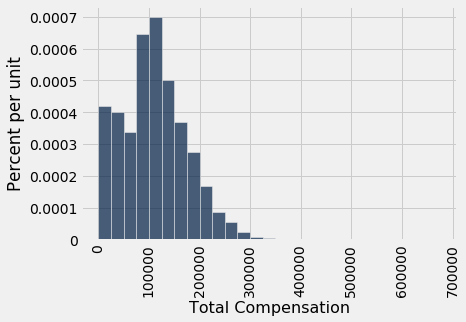

In [17]:
sf_bins = np.arange(0, 700000, 25000)
sf.hist('Total Compensation', bins=sf_bins)

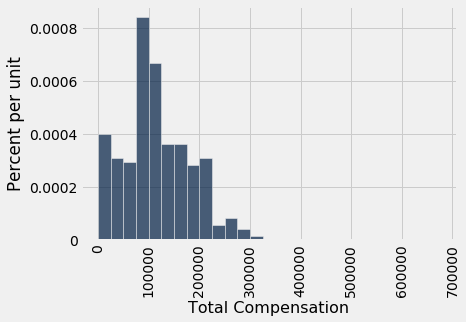

In [18]:
our_sample.hist('Total Compensation', bins=sf_bins)

In [21]:
resample1 = our_sample.sample(300, with_replacement=True)

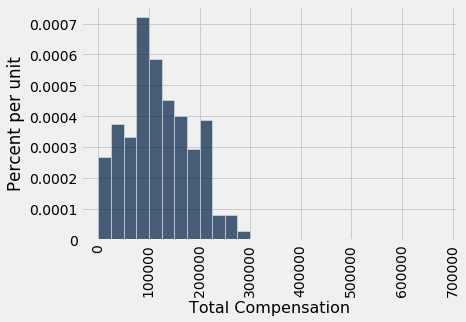

In [22]:
resample1.hist('Total Compensation', bins=sf_bins)

In [23]:
resample2 = our_sample.sample()

In [24]:
percentile(50, resample1.column('Total Compensation'))

112891.42999999999

In [25]:
percentile(50, resample2.column('Total Compensation'))

110789.35000000001

In [26]:
medians = make_array()

for i in np.arange(1000):
    resampled = our_sample.sample()
    median = percentile(50, resampled.column('Total Compensation'))
    medians = np.append(medians, median)

In [28]:
def bootstrap_median(original_sample, label, replications):
    """Simulate sample median:
    original_sample: table containing the original sample
    label: label of column containing the variable
    replications: number of bootstrap samples
    Returns array of bootstrap sample medians
    """
    medians = make_array()
    for i in np.arange(replications):
        bootstrap_sample = original_sample.sample()
        resampled_median = percentile(50, bootstrap_sample.column(label))
        medians = np.append(medians, resampled_median)
        
    return medians

In [29]:
bstrap_medians = bootstrap_median(our_sample, 'Total Compensation', 1000)

In [31]:
pop_median = percentile(50, sf.column('Total Compensation'))

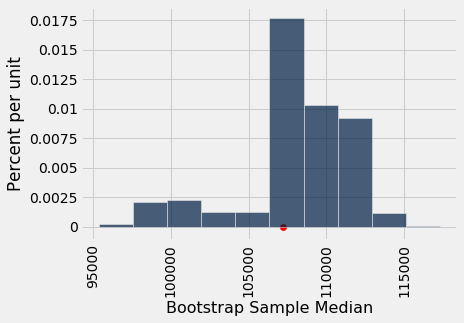

In [32]:
resampled_medians = Table().with_column(
    'Bootstrap Sample Median', bstrap_medians)

resampled_medians.hist()

plots.scatter(pop_median, 0, color='red', s=40);

In [34]:
left = percentile(2.5, bstrap_medians)
left

99032.600000000006

In [36]:
right = percentile(97.5, bstrap_medians)
right

112965.14999999999

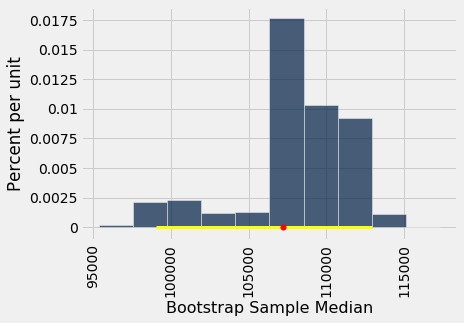

In [37]:
resampled_medians.hist()

plots.plot([left, right], [0, 0], color='yellow', lw=3, zorder=1)
plots.scatter(pop_median, 0, color='red', s=30, zorder=2);

In [38]:
confidence_interval = make_array(left, right)
confidence_interval

array([  99032.6 ,  112965.15])

In [ ]:
# THE BIG SIMULATION: This one takes a long time.

# Generate the endpoints of 50 intervals

left_ends = make_array()
right_ends = make_array()

for i in np.arange(50):
    first_sample = sf.sample(300, with_replacement=False)
    medians = bootstrap_median(first_sample, 'Total Compensation', 2000)
    left_ends = np.append(left_ends, percentile(2.5, medians))
    right_ends = np.append(right_ends, percentile(97.5, medians))

In [ ]:
intervals = Table().with_column(
    'Left', left_ends,
    'Right', right_ends
)    

In [ ]:
intervals

In [ ]:
good = intervals.where('Left', are.below(pop_median)).where('Right', are.above(pop_median)).num_rows

In [ ]:
good / 50